In [2]:
import geopandas as gpd
import fiona 

In [3]:
%ls -lh ../data/raw/territoires/iris*
# iris_france.gpkg => 26Mo

-rwx------@ 1 jean-jacques  staff    26M Sep 17 11:18 ../data/raw/territoires/iris_france.gpkg*


In [4]:
import os
path = '../data/raw/territoires/iris_france.gpkg'
print(f"Does it exist? {os.path.exists(path)}")

Does it exist? True


In [5]:
gpkg_path = '../data/raw/territoires/iris_france.gpkg'
layers = fiona.listlayers(gpkg_path)

print("Layers trouvés :")
for layer in layers:
    print("-", layer)

Layers trouvés :
- contours_iris_pe


Layers trouvés :

- contours_iris_pe => Iris Pole Emploi


In [6]:
gdf_iris = gpd.read_file(gpkg_path, layer='contours_iris_pe')
print("Colonnes:", gdf_iris.columns.tolist())
print("CRS:", gdf_iris.crs)
print("Shape:", gdf_iris.shape)

Colonnes: ['cleabs', 'code_insee', 'nom_commune', 'iris', 'code_iris', 'nom_iris', 'type_iris', 'geometry']
CRS: EPSG:2154
Shape: (48512, 8)


In [7]:
gdf_iris.head()

,cleabs,code_insee,nom_commune,iris,code_iris,nom_iris,type_iris,geometry
0,IRIS____0000000670430101,67043,Bischheim,0101,670430101,Bischheim,A,"MULTIPOLYGON (((1052052.5 6848302.2, 1052346.7..."
1,IRIS____0000000132020101,13202,Marseille 2e Arrondissement,0101,132020101,Marseille 2e Arrondissement,A,"MULTIPOLYGON (((892392.4 6249040.5, 892189 624..."
2,IRIS____0000000561850101,56185,Quéven,0101,561850101,Quéven,A,"MULTIPOLYGON (((217035.9 6759952.7, 216941.9 6..."
3,IRIS____0000000930630101,93063,Romainville,0101,930630101,Romainville,A,"MULTIPOLYGON (((659020 6865990.2, 658978.6 686..."
4,IRIS____0000000940480101,94048,Marolles-en-Brie,0101,940480101,Marolles-en-Brie,A,"MULTIPOLYGON (((667454 6850589.8, 667714.1 685..."


In [8]:
gdf_iris.to_csv('../data/raw/geo/geom_iris.csv', index=False)
gdf_iris_deg = gdf_iris.copy().to_crs(epsg=4326)
gdf_iris_deg.to_parquet('../data/raw/geo/geom_iris.parquet', index=False)

In [9]:
df_iris_toulouse = gdf_iris[gdf_iris['nom_commune'] == 'Toulouse']

In [10]:
df_iris_toulouse.head()


,cleabs,code_insee,nom_commune,iris,code_iris,nom_iris,type_iris,geometry
762,IRIS____0000000315553601,31555,Toulouse,3601,315553601,Toulouse,A,"MULTIPOLYGON (((570932.3 6281932.5, 570992.1 6..."
763,IRIS____0000000315553701,31555,Toulouse,3701,315553701,Toulouse,A,"MULTIPOLYGON (((572456 6281784.5, 572819.8 628..."
770,IRIS____0000000315554101,31555,Toulouse,4101,315554101,Toulouse,A,"MULTIPOLYGON (((577724.6 6279903.5, 577300.2 6..."
772,IRIS____0000000315554701,31555,Toulouse,4701,315554701,Toulouse,A,"MULTIPOLYGON (((579990.4 6275473.7, 579906.9 6..."
773,IRIS____0000000315554702,31555,Toulouse,4702,315554702,Toulouse,A,"MULTIPOLYGON (((576863 6277016, 577296.2 62768..."


Dans la nomenclature INSEE des IRIS :

H = IRIS d'Habitat (résidentiel) — le plus courant, zones principalement habitées
A = IRIS de Grande surface (activité) — zones commerciales, industrielles, zones d'activité

Il existe aussi :

Z = communes non découpées en IRIS (communes de moins de 10 000 habitants avec un seul IRIS)

In [11]:
df_iris_toulouse['type_iris'].value_counts()

type_iris
H    146
A      7
Name: count, dtype: int64

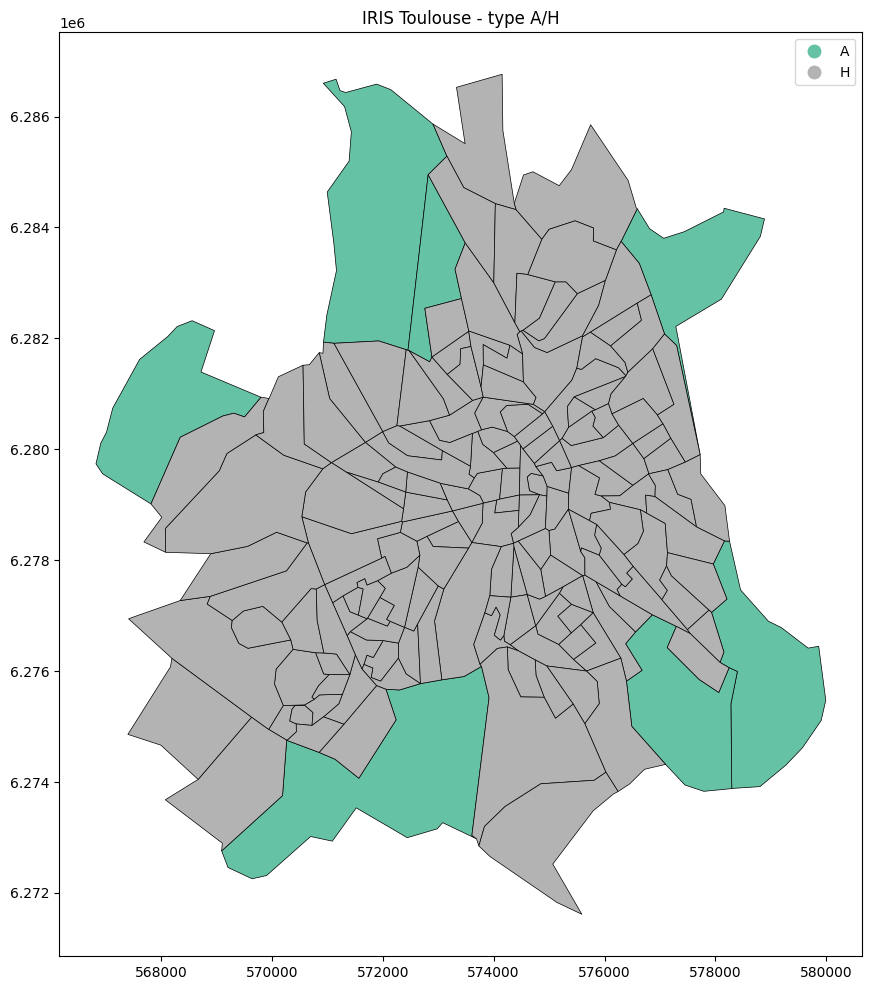

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
df_iris_toulouse.plot(
    ax=ax,
    column='type_iris',
    categorical=True,
    legend=True,
    cmap='Set2',
    edgecolor='black',
    linewidth=0.5
)
plt.title("IRIS Toulouse - type A/H")
plt.show()


In [13]:
df_iris_toulouse = df_iris_toulouse.to_crs(epsg=4326)
#df_iris_toulouse['geometry'] = df_iris_toulouse.geometry.simplify(tolerance=0.00001)
cols_utiles = ['code_iris', 'nom_iris', 'type_iris', 'geometry']


In [14]:
import folium
from folium import GeoJson

# S'assurer qu'on est en WGS84
df_plot = df_plot = df_iris_toulouse[cols_utiles].to_crs(epsg=4326)

m = folium.Map(location=[43.6, 1.44], zoom_start=12)

colors = {'A': 'blue', 'H': 'red'}

GeoJson(
    df_plot,
    style_function=lambda f: {
        'fillColor': colors.get(f['properties']['type_iris'], 'gray'),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(fields=['nom_iris', 'type_iris'])
).add_to(m)

m

Le nom de l'iris = nom de la commune 

Chercher une autre source 

https://www.data.gouv.fr/datasets/contour-des-iris-insee-tout-en-un

In [15]:

%ls ../../../../Downloads/iris-2013-01-01


iris-2013-01-01.dbf  iris-2013-01-01.shp
iris-2013-01-01.prj  iris-2013-01-01.shx


In [16]:
import geopandas as gpd
iris_full = gpd.read_file('../../../../Downloads/iris-2013-01-01/iris-2013-01-01.shp')


In [17]:
iris_full.columns

Index(['DEPCOM', 'NOM_COM', 'IRIS', 'DCOMIRIS', 'NOM_IRIS', 'TYP_IRIS',
       'ORIGINE', 'geometry'],
      dtype='object')

| Colonne  | Type   | Signification                                      | Exemple Toulouse                 |
| -------- | ------ | -------------------------------------------------- | -------------------------------- |
| DEPCOM   | str(5) | Code INSEE commune (dépt+commune)                  | '31555' geoservices.ign​         |
| NOM_COM  | str    | Nom commune (majuscules)                           | 'TOULOUSE'                       |
| IRIS     | str(4) | Numéro IRIS local dans la commune                  | '3601', '3701'                   |
| DCOMIRIS | str(9) | Code IRIS complet (DEPCOM + IRIS)                  | '315553601'                      |
| NOM_IRIS | str    | Nom quartier IRIS (petites communes = nom commune) | 'BAGATELLE', 'MIRAIL UNIVERSITE' |
| TYP_IRIS | str(1) | Type : Z/H/A/D                                     | 'H' habitat                      |
| ORIGINE  | str(1) | Méthode numérisation : 1=Contours îlots, 2=autre   | '1' ou '2' geoservices.ign​      |
| geometry | Geo    | Polygone IRIS (WGS84)                              | MULTIPOLYGON tes coords          |

In [18]:
iris_full.head()

,DEPCOM,NOM_COM,IRIS,DCOMIRIS,NOM_IRIS,TYP_IRIS,ORIGINE,geometry
0,97201,L' AJOUPA-BOUILLON,0000,972010000,L'AJOUPA-BOUILLON,Z,None,"POLYGON ((-61.09797 14.83121, -61.09867 14.830..."
1,97202,LES ANSES-D'ARLET,0000,972020000,LES ANSES-D'ARLET,Z,None,"POLYGON ((-61.07379 14.54041, -61.07337 14.538..."
2,97203,BASSE-POINTE,0000,972030000,BASSE-POINTE,Z,None,"POLYGON ((-61.08307 14.85248, -61.08441 14.850..."
3,97204,LE CARBET,0000,972040000,LE CARBET,Z,None,"POLYGON ((-61.15649 14.73308, -61.15488 14.733..."
4,97205,CASE-PILOTE,0000,972050000,CASE-PILOTE,Z,None,"POLYGON ((-61.12423 14.69021, -61.12086 14.689..."


In [19]:
iris_full.shape

(508980, 8)

In [20]:
# Compte global
print(iris_full['TYP_IRIS'].value_counts())

# Seulement communes découpées (pas Z)
iris_decoupes = iris_full[iris_full['TYP_IRIS'] != 'Z']
print(iris_decoupes['TYP_IRIS'].value_counts())

# Toulouse uniquement
toulouse = iris_full[iris_full['DEPCOM'] == '31555']
print(toulouse['TYP_IRIS'].value_counts())
print(toulouse[['IRIS', 'NOM_IRIS', 'TYP_IRIS']].head(10))


TYP_IRIS
Z    348060
H    148560
A      8280
D      4070
Name: count, dtype: int64
TYP_IRIS
H    148560
A      8280
D      4070
Name: count, dtype: int64
TYP_IRIS
H    1460
A      70
Name: count, dtype: int64
      IRIS         NOM_IRIS TYP_IRIS
4201  1203           BRANLY        H
4202  5502  SAINT SIMON EST        H
4221  1102       COLOMBETTE        H
4255  1302       SAINT-LEON        H
4259  5102            MILAN        H
4261  5202         TEL AVIV        H
4262  5201          LESTANG        H
4263  5302          POULENC        H
4264  5303       AURIACOMBE        H
4270  2801          BECANNE        H


In [21]:
tes_codes = ['3601', '3701', '4101', '4701']
print(toulouse[toulouse['IRIS'].isin(tes_codes)][['IRIS', 'NOM_IRIS', 'TYP_IRIS']])

        IRIS      NOM_IRIS TYP_IRIS
4946    3601     GINESTOUS        A
4970    3701      FONDEYRE        A
4991    4101       GRAMONT        A
4995    4701  MARCAISSONNE        A
55844   3601     GINESTOUS        A
55868   3701      FONDEYRE        A
55889   4101       GRAMONT        A
55893   4701  MARCAISSONNE        A
106742  3601     GINESTOUS        A
106766  3701      FONDEYRE        A
106787  4101       GRAMONT        A
106791  4701  MARCAISSONNE        A
157640  3601     GINESTOUS        A
157664  3701      FONDEYRE        A
157685  4101       GRAMONT        A
157689  4701  MARCAISSONNE        A
208538  3601     GINESTOUS        A
208562  3701      FONDEYRE        A
208583  4101       GRAMONT        A
208587  4701  MARCAISSONNE        A
259436  3601     GINESTOUS        A
259460  3701      FONDEYRE        A
259481  4101       GRAMONT        A
259485  4701  MARCAISSONNE        A
310334  3601     GINESTOUS        A
310358  3701      FONDEYRE        A
310379  4101       GRAMONT  

| Aspect         | Ton fichier initial                                            | « Tout en un » data.gouv                                       | Contours IRIS IGN officiel     |
| -------------- | -------------------------------------------------------------- | -------------------------------------------------------------- | ------------------------------ |
| Champs         | code_insee, nom_commune, iris_local, type_iris (A/H), geometry | + NOM_IRIS descriptif, CODE_IRIS complet, TYP_IRIS standardisé | Idem + docs complètes data+1   |
| Noms quartiers | « Toulouse » partout (pas de NOM_IRIS)                         | Vrais noms (Branly, Saint Simon Est, Bagatelle…)               | Vrais noms officiels           |
| Types IRIS     | A/H (incomplet)                                                | Z/H/A/D complet (348k Z, 148k H, 8k A, 4k D)                   | Z/H/A/D complet                |
| Format         | Lambert-93                                                     | WGS84 (1 fichier national)                                     | Lambert-93 (multi-fichiers 7z) |
| Taille         | Toulouse uniquement (?)                                        | ~509k IRIS France entière                                      | ~509k IRIS (multi-éditions)    |
| Utilité projet | Géométrie de base                                              | Idéal : join facile + noms                                     | Référence officielle           |

In [22]:
iris_df = iris_full.copy()

In [23]:
import pandas as pd

# Stats globales (comme tu as fait)
print("=== STATS GLOBALES ===")
print(iris_df['TYP_IRIS'].value_counts())
print(f"Communes totales: {iris_df['DEPCOM'].nunique()}")
print(f"Communes Z uniques: {iris_df[iris_df['TYP_IRIS']=='Z']['DEPCOM'].nunique()}")

# Toulouse uniquement
toulouse = iris_df[iris_df['DEPCOM'] == '31555']
print("\n=== TOULOUSE (31555) ===")
print(f"Nombre IRIS: {len(toulouse)}")
print(toulouse['TYP_IRIS'].value_counts())
print("\nExemples 10 premiers:")
print(toulouse.head(10))


=== STATS GLOBALES ===
TYP_IRIS
Z    348060
H    148560
A      8280
D      4070
Name: count, dtype: int64
Communes totales: 36727
Communes Z uniques: 34806

=== TOULOUSE (31555) ===
Nombre IRIS: 1530
TYP_IRIS
H    1460
A      70
Name: count, dtype: int64

Exemples 10 premiers:
     DEPCOM   NOM_COM  IRIS   DCOMIRIS         NOM_IRIS TYP_IRIS ORIGINE  \
4201  31555  TOULOUSE  1203  315551203           BRANLY        H    None   
4202  31555  TOULOUSE  5502  315555502  SAINT SIMON EST        H    None   
4221  31555  TOULOUSE  1102  315551102       COLOMBETTE        H    None   
4255  31555  TOULOUSE  1302  315551302       SAINT-LEON        H    None   
4259  31555  TOULOUSE  5102  315555102            MILAN        H    None   
4261  31555  TOULOUSE  5202  315555202         TEL AVIV        H    None   
4262  31555  TOULOUSE  5201  315555201          LESTANG        H    None   
4263  31555  TOULOUSE  5302  315555302          POULENC        H    None   
4264  31555  TOULOUSE  5303  315555303


TYP_IRIS

- Z (communes non découpées)   348060
- H (Habitat)   148560
- A (Activité)    8280
- D (Divers)    4070

TYP_IRIS = D : IRIS Divers (4 070 en France).

Définition officielle INSEE
IRIS D = grandes zones spécifiques peu habitées avec superficie importante :

🌳 Forêts, bois

🏞️ Parcs de loisirs

⚓ Zones portuaires

✈️ Aérodromes

🏭 Grandes zones industrielles inhabitées

💧 Cours d'eau importants

⚽ Stades, hippodromes

Critères : Pas les critères pop/salariés des H/A → zones hors habitat/activité normale.

## Exclure type Z

Seul H est interessant pour la santé mais garder A et D pour affichage carte 

In [25]:

df_ref_iris = iris_full[iris_full['TYP_IRIS'] != 'Z']

In [26]:
df_ref_iris.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
import geopandas as gpd

# REPROJECTION Lambert-93 OBLIGATOIRE
df_l93 = df_ref_iris.to_crs('EPSG:2154')  # Métrique France
df_l93['centroide_precis'] = df_l93.geometry.centroid

df_latlon = df_l93.to_crs('EPSG:4326')  # Retour WGS84
df_latlon['lat'] = df_latlon.centroid.y  
df_latlon['lon'] = df_latlon.centroid.x  


/var/folders/vr/hhxf111n55b91l_9j5qxjdrm0000gn/T/ipykernel_62045/4227097688.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_latlon['lat'] = df_latlon.centroid.y
/var/folders/vr/hhxf111n55b91l_9j5qxjdrm0000gn/T/ipykernel_62045/4227097688.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_latlon['lon'] = df_latlon.centroid.x


In [28]:
df_latlon.columns

Index(['DEPCOM', 'NOM_COM', 'IRIS', 'DCOMIRIS', 'NOM_IRIS', 'TYP_IRIS',
       'ORIGINE', 'geometry', 'centroide_precis', 'lat', 'lon'],
      dtype='object')

In [48]:
df_ref_iris_final = df_latlon.copy()

df_ref_iris_final.drop(columns=['NOM_COM','DCOMIRIS', 'ORIGINE','centroide_precis'], inplace=True)

In [53]:


df_ref_iris_final = df_ref_iris_final.rename(columns={
    'DEPCOM': 'code_insee_comm',
    'IRIS': 'code_iris',
    'NOM_IRIS': 'nom_quartier', 
    'TYP_IRIS': 'type_iris',
    'lat': 'latitude',
    'lon': 'longitude'
})

In [54]:
df_ref_iris_final.columns

Index(['code_insee_comm', 'code_iris', 'nom_quartier', 'type_iris', 'geometry',
       'latitude', 'longitude'],
      dtype='object')

In [55]:
df_ref_iris_final.head()

,code_insee_comm,code_iris,nom_quartier,type_iris,geometry,latitude,longitude
6,97207,0701,BOURG,H,"POLYGON ((-60.96514 14.57206, -60.96515 14.572...",14.574347,-60.975683
7,97207,0702,LA MARIE,H,"POLYGON ((-60.96763 14.57495, -60.96769 14.574...",14.578617,-60.969729
8,97207,0703,PETITE COCOTTE-DURIVAGE,H,"POLYGON ((-61.00229 14.56531, -61.00225 14.565...",14.567005,-60.973924
9,97207,0704,GRANDE SAVANE-LA BEAUVILLE-BOIS NEUF,H,"POLYGON ((-60.93778 14.59757, -60.93781 14.597...",14.583320,-60.949560
10,97207,0705,BAC-FOND D'OR-FOND SAVANE,H,"POLYGON ((-60.98185 14.59355, -60.98183 14.593...",14.595791,-60.961458


In [57]:
df_ref_iris_final.to_parquet('../data/processed/ref/ref_iris_geom.parquet')

In [ ]:
def simplify_geom(gdf, tolerance=20):
    # Reprojection en Lambert 93 car pandas peut sans qu'on le sache le charger en WGS84 
    # la simplification est plus efficace dans un système métrique
    gdf = gdf.to_crs(2154)

    # Correction + simplification + correction
    gdf["geometry"] = (
        gdf["geometry"]
        .buffer(0)
        .simplify(tolerance, preserve_topology=True) # Topologie préservée
        .buffer(0)
    )

    # Reprojection finale en WGS84 pour le web
    return gdf.to_crs(4326)

In [60]:
tolerances = [5, 10, 12, 15, 20]
for tol in tolerances:
    test = simplify_geom(df_ref_iris_final.head(10), tolerance=tol)
    nb_points_avant = len(df_ref_iris_final.geometry.iloc[0].exterior.coords)
    nb_points_apres = len(test.geometry.iloc[0].exterior.coords)
    gain = nb_points_avant - nb_points_apres
    print(f"Tolérance {tol}m → {gain} points gagnés ({nb_points_apres} restants)")


Tolérance 5m → 367 points gagnés (89 restants)
Tolérance 10m → 389 points gagnés (67 restants)
Tolérance 12m → 397 points gagnés (59 restants)
Tolérance 15m → 401 points gagnés (55 restants)
Tolérance 20m → 410 points gagnés (46 restants)


## Résultats test:

- Tolérance 5m → 367 points gagnés (89 restants)
- Tolérance 10m → 389 points gagnés (67 restants)
- Tolérance 12m → 397 points gagnés (59 restants)
- Tolérance 15m → 401 points gagnés (55 restants)
- Tolérance 20m → 410 points gagnés (46 restants)

| Tolérance | Points restants | Gain | Recommandation                 |
| --------- | --------------- | ---- | ------------------------------ |
| 5m        | 89              | 367  | Trop détaillé (lent Streamlit) |
| 10m       | 67              | 389  | ✅ BON équilibre                |
| 12m       | 59              | 397  | ✅ OPTIMAL (recommandé)         |
| 15m       | 55              | 401  | Très bon                       |
| 20m       | 46              | 410  | Rapide (perte détails fins)    |

Simplification déjà utilisées sur d'autres territoires: 

- comm_s = simplify_geom(df_comm, tolerance=20)
- dept_s = simplify_geom(df_dept, tolerance=50)
- epci_s = simplify_geom(df_epci, tolerance=50)
- reg_s = simplify_geom(df_reg, tolerance=50)
- coll_s = simplify_geom(df_coll, tolerance=50)

In [61]:
# Commune : 20m (déjà fait)
# IRIS    : 12m (détails quartiers conservés)

iris_s = simplify_geom(df_ref_iris_final, tolerance=12)


In [63]:
print("Gain moyen:", len(iris_s.geometry.iloc[0].exterior.coords))

Gain moyen: 59


In [ ]:
# Apercu type D
iris_s[(iris_s['type_iris'] == 'D') & (iris_s['code_insee_comm'].str.startswith('15'))].head()

,code_insee_comm,code_iris,nom_quartier,type_iris,geometry,latitude,longitude
14709,15014,0109,ZONE VERTE,D,"POLYGON ((2.45065 44.93156, 2.45239 44.9316, 2...",44.933952,2.451071
65607,15014,0109,ZONE VERTE,D,"POLYGON ((2.45065 44.93156, 2.45239 44.9316, 2...",44.933952,2.451071
116505,15014,0109,ZONE VERTE,D,"POLYGON ((2.45065 44.93156, 2.45239 44.9316, 2...",44.933952,2.451071
167403,15014,0109,ZONE VERTE,D,"POLYGON ((2.45065 44.93156, 2.45239 44.9316, 2...",44.933952,2.451071
218301,15014,0109,ZONE VERTE,D,"POLYGON ((2.45065 44.93156, 2.45239 44.9316, 2...",44.933952,2.451071


In [71]:
iris_s.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
iris_s.to_parquet('../data/processed/ref/ref_iris_geom_simplified.parquet')